In [1]:
# Imports:|
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from prepare import telco_prep
from explore import chi2_internet_service

In [2]:
# acquiring, preparing the data
# splitting data into train, validate, and test
df = telco_prep()
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,internet_service_type,online_security,...,streaming_tv,streaming_movies,contract,contract_type,payment_method,payment_type,paperless_billing,monthly_charges,total_charges,churn
0,Female,No,Yes,Yes,9,Yes,No,Yes,DSL,No,...,No,No,Yes,One year,Mailed check,Manual,Yes,65.6,593.30,No
1,Male,No,No,No,9,Yes,Yes,Yes,DSL,No,...,No,No,No,Month-to-month,Mailed check,Manual,No,59.9,542.40,No
2,Male,No,No,No,4,Yes,No,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Electronic check,Manual,Yes,73.9,280.85,Yes
3,Male,Yes,Yes,No,13,Yes,No,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Electronic check,Manual,Yes,98.0,1237.85,Yes
4,Female,Yes,Yes,No,3,Yes,No,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Mailed check,Manual,Yes,83.9,267.40,Yes


In [3]:
# We assign the list of column names to a variable. Lets removed columns that hold numerical values. 
columns_to_check = ['gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'internet_service_type', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'contract_type', 'payment_method', 'payment_type',
       'paperless_billing', 'churn']

# Calculate the maximum column name length for formatting
max_col_length = max(len(column) for column in columns_to_check)

# Loop through the columns and print unique values with aligned columns
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"{column.ljust(max_col_length)}  {unique_values}")

gender                 ['Female' 'Male']
senior_citizen         ['No' 'Yes']
partner                ['Yes' 'No']
dependents             ['Yes' 'No']
phone_service          ['Yes' 'No']
multiple_lines         ['No' 'Yes']
internet_service       ['Yes' 'No']
internet_service_type  ['DSL' 'Fiber optic' 'No internet service']
online_security        ['No' 'Yes']
online_backup          ['No' 'Yes']
device_protection      ['No' 'Yes']
tech_support           ['No' 'Yes']
streaming_tv           ['No' 'Yes']
streaming_movies       ['No' 'Yes']
contract               ['Yes' 'No']
contract_type          ['One year' 'Month-to-month' 'Two year']
payment_method         ['Mailed check' 'Electronic check' 'Credit card' 'Bank transfer']
payment_type           ['Manual' 'Automatic']
paperless_billing      ['Yes' 'No']
churn                  ['No' 'Yes']


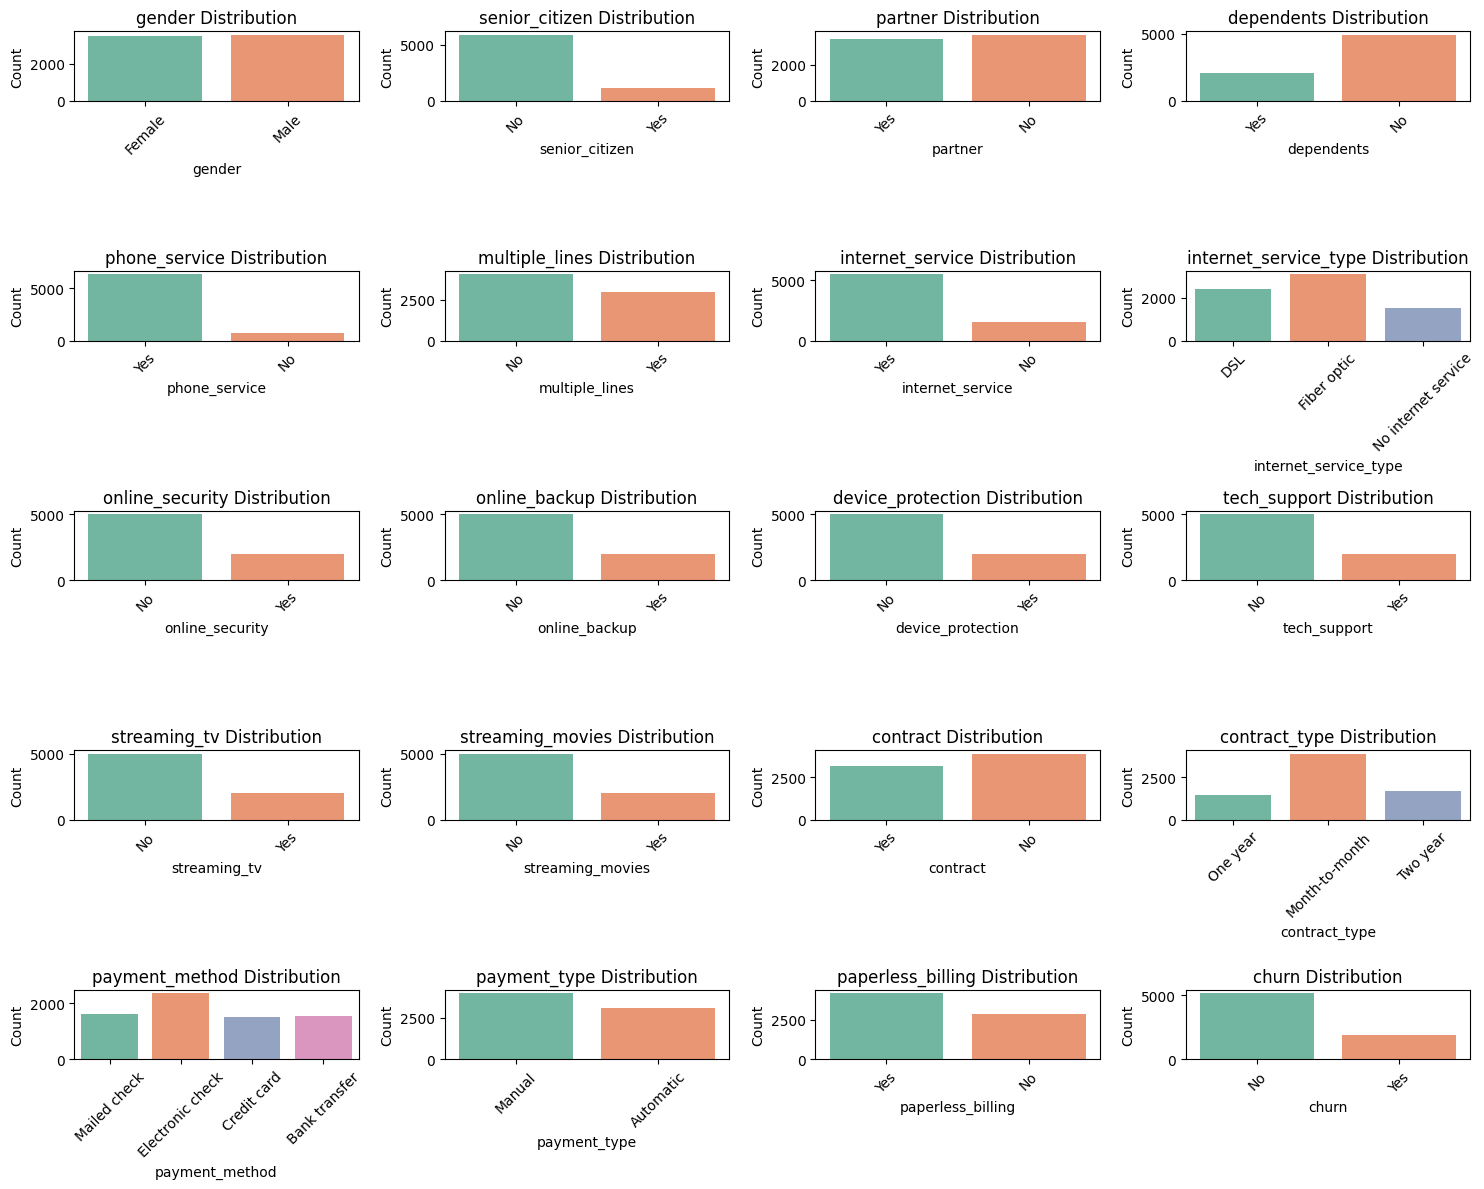

In [4]:
# Univariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate basic statistics for numerical columns
numerical_columns = ['tenure', 'monthly_charges', 'total_charges']
numerical_stats = df[numerical_columns].describe()

# Visualize the distribution of categorical variables
categorical_columns = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service',
                       'multiple_lines', 'internet_service', 'internet_service_type',
                       'online_security', 'online_backup', 'device_protection',
                       'tech_support', 'streaming_tv', 'streaming_movies',
                       'contract', 'contract_type', 'payment_method', 'payment_type',
                       'paperless_billing', 'churn']

plt.figure(figsize=(15, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 4, i)
    sns.countplot(data=df, x=column, palette="Set2")
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()


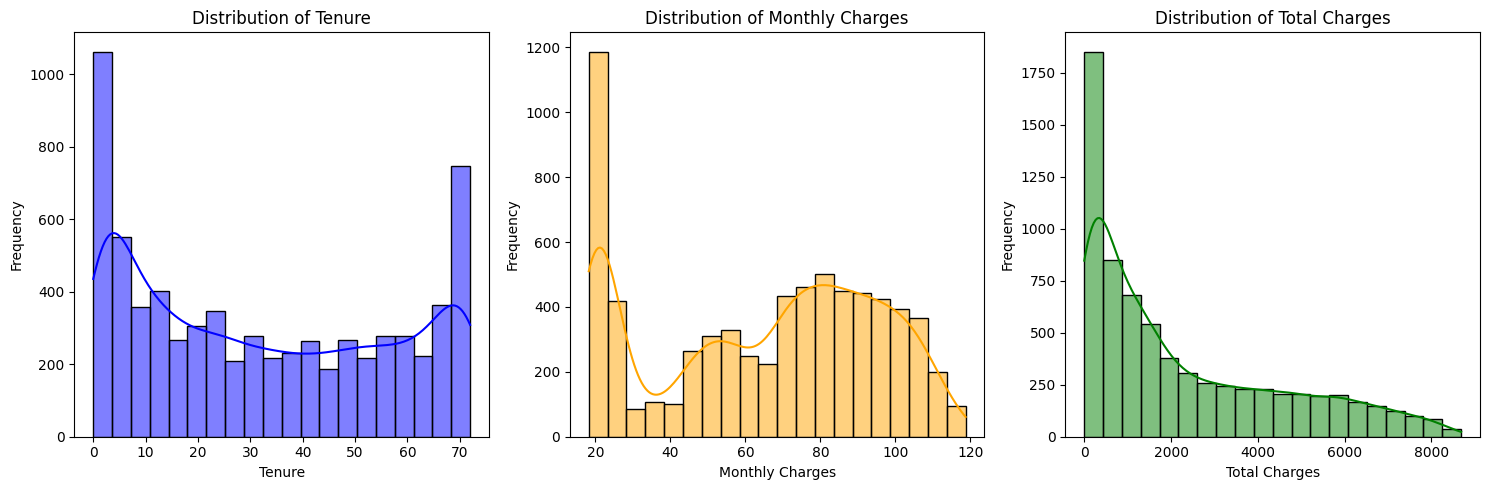

In [5]:
# Univariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate basic statistics for numerical columns
numerical_columns = ['tenure', 'monthly_charges', 'total_charges']
numerical_stats = df[numerical_columns].describe()

# Visualize the distribution of numerical variables
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['tenure'], bins=20, kde=True, color='blue')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')

plt.subplot(1, 3, 2)
sns.histplot(df['monthly_charges'], bins=20, kde=True, color='orange')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')

plt.subplot(1, 3, 3)
sns.histplot(df['total_charges'], bins=20, kde=True, color='green')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Total Charges')

plt.tight_layout()
plt.show()


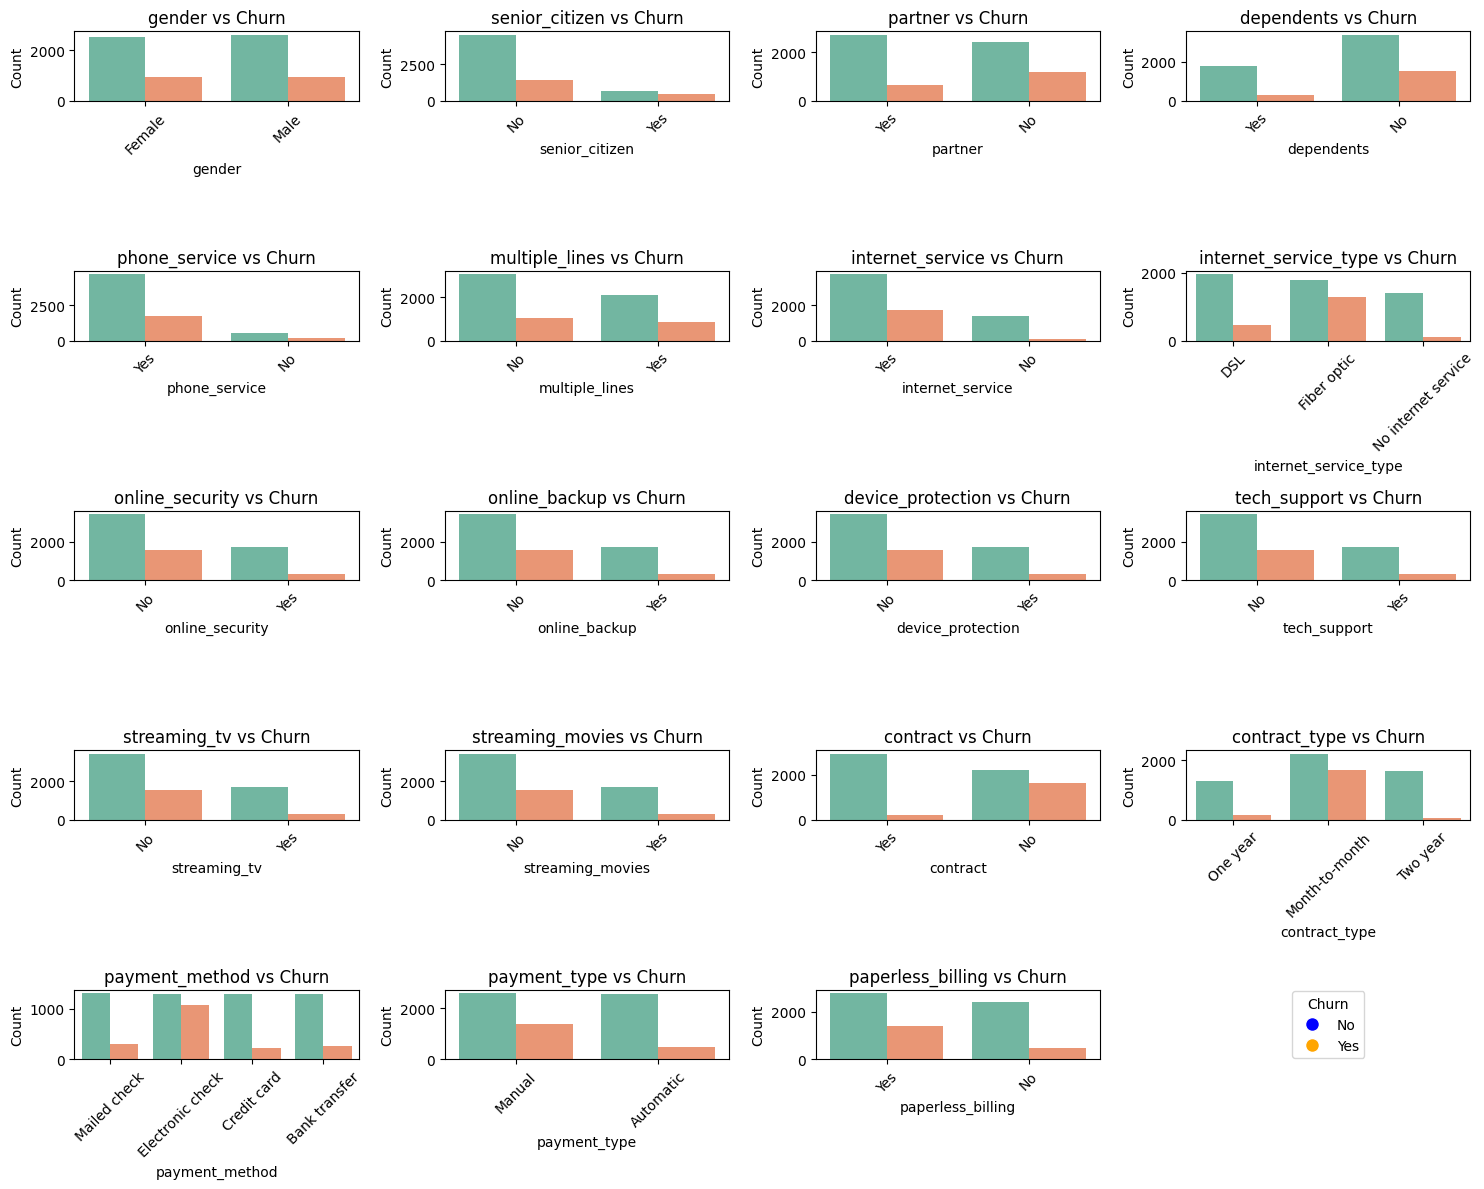

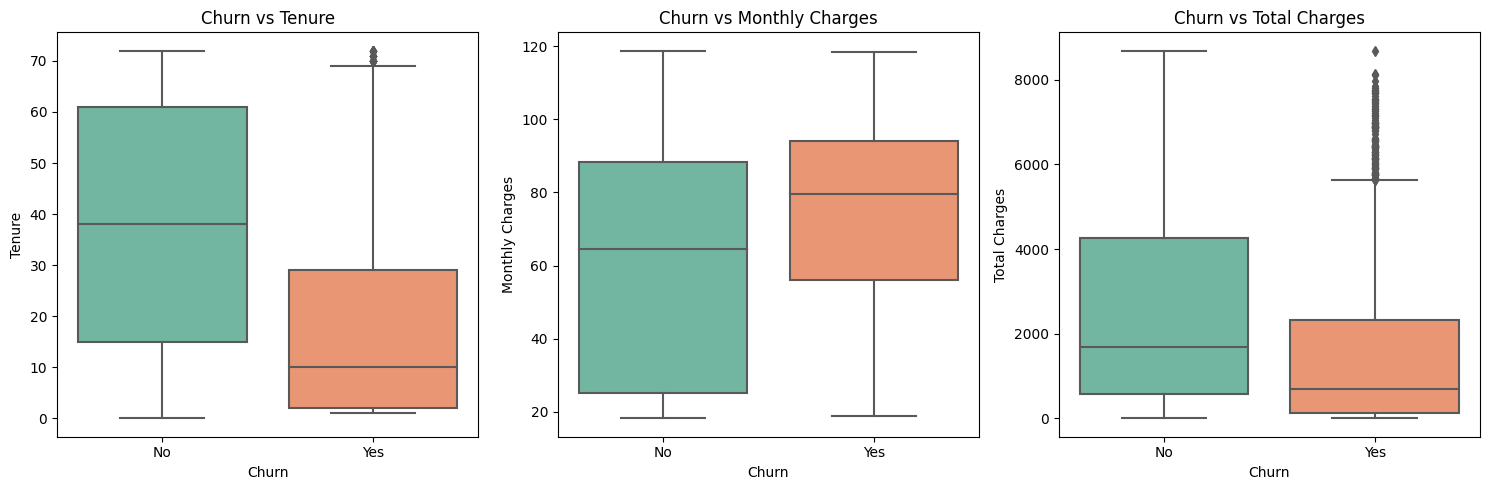

In [6]:
# Bivariate Analysis

# Relationship between categorical variables and churn
plt.figure(figsize=(15, 12))
for i, column in enumerate(categorical_columns[:-1], 1):
    plt.subplot(5, 4, i)
    sns.countplot(data=df, x=column, hue='churn', palette='Set2')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.title(f'{column} vs Churn')
    plt.legend().set_visible(False)  # Hide legend for individual plots

# Add a single legend in the last subplot (5, 4, 20)
plt.subplot(5, 4, 20)
plt.axis('off')  # Turn off the axis for the empty plot

# Manually add color patches and legend labels
legend_colors = ['blue', 'orange']  # Match with the 'Set2' palette
legend_labels = ['No', 'Yes']
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                   for color, label in zip(legend_colors, legend_labels)]

plt.legend(handles=legend_patches, title='Churn', loc='center')

plt.tight_layout()
plt.show()


# Relationship between numerical variables and churn
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='churn', y='tenure', palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Churn vs Tenure')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='churn', y='monthly_charges', palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Churn vs Monthly Charges')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='churn', y='total_charges', palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.title('Churn vs Total Charges')

plt.tight_layout()
plt.show()


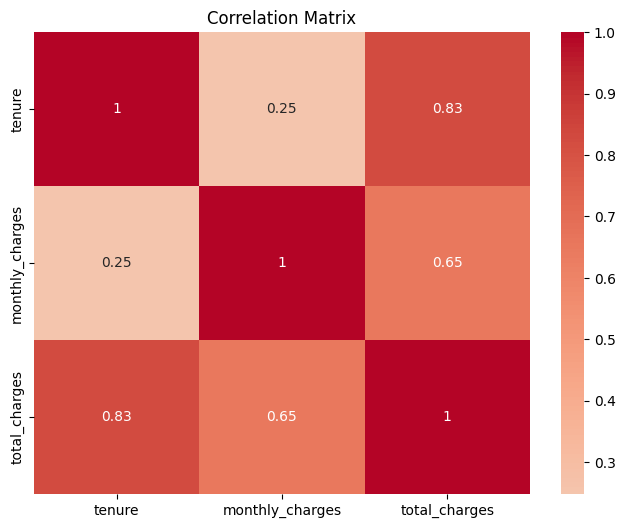

Numerical Correlation Matrix:
                   tenure  monthly_charges  total_charges
tenure           1.000000         0.247900       0.826178
monthly_charges  0.247900         1.000000       0.651174
total_charges    0.826178         0.651174       1.000000


In [7]:
# Correlation Analysis

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Print the correlation matrix
print("Numerical Correlation Matrix:")
print(correlation_matrix)

In [8]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

categorical_analysis_columns = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service',
                       'multiple_lines', 'internet_service', 'internet_service_type',
                       'online_security', 'online_backup', 'device_protection',
                       'tech_support', 'streaming_tv', 'streaming_movies',
                       'contract', 'contract_type', 'payment_method', 'payment_type',
                       'paperless_billing']

chi2_results = {}
for column in categorical_analysis_columns:
    contingency_table = pd.crosstab(df[column], df['churn'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    chi2_results[column] = {'chi2': chi2, 'p-value': p}

# Create a DataFrame to display chi-squared test results
chi2_df = pd.DataFrame(chi2_results).T
chi2_df.columns = ['Chi2 Value', 'P-value']

# Display the full DataFrame
print("Chi-Squared Test Results for Categorical Variables:")
print(chi2_df)

Chi-Squared Test Results for Categorical Variables:
                        Chi2 Value        P-value
gender                    0.484083   4.865787e-01
senior_citizen          159.426300   1.510067e-36
partner                 158.733382   2.139911e-36
dependents              189.129249   4.924922e-43
phone_service             0.915033   3.387825e-01
multiple_lines           11.143251   8.433795e-04
internet_service        364.519799   2.920300e-81
internet_service_type   732.309590  9.571788e-160
online_security         205.633104   1.232098e-46
online_backup           205.633104   1.232098e-46
device_protection       205.633104   1.232098e-46
tech_support            205.633104   1.232098e-46
streaming_tv            205.633104   1.232098e-46
streaming_movies        205.633104   1.232098e-46
contract               1153.971661  6.147586e-253
contract_type          1184.596572  5.863038e-258
payment_method          648.142327  3.682355e-140
payment_type            309.348557   3.027873e-6

In [9]:
# Calculate churn rates for each internet service type
churn_rates_by_internet_type = df.groupby('internet_service_type')['churn'].value_counts(normalize=True).unstack()

# Display churn rates
print(churn_rates_by_internet_type)


churn                        No       Yes
internet_service_type                    
DSL                    0.810409  0.189591
Fiber optic            0.581072  0.418928
No internet service    0.925950  0.074050


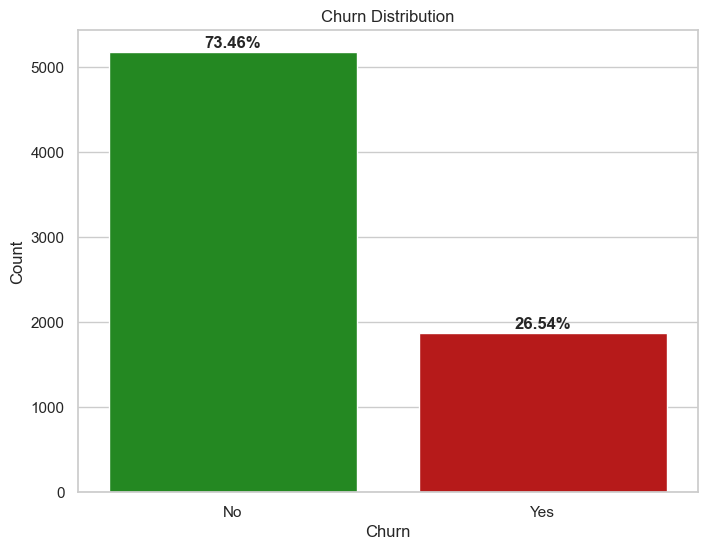

In [53]:
def plot_churn_distribution(df):
    plt.figure(figsize=(8, 6))
    
    total_count = len(df)
    churn_counts = df['churn'].value_counts()
    
    sns.countplot(data=df, x='churn', palette=["#149911", "#D00000"])
    plt.title('Churn Distribution')
    plt.xlabel('Churn')
    plt.ylabel('Count')
    
    for i, count in enumerate(churn_counts):
        percentage = (count / total_count) * 100
        plt.text(i, count + 50, f'{percentage:.2f}%', ha='center', weight='bold')
    
    plt.show()

# Call the function to plot the distribution of churn with percentages and specified palette
plot_churn_distribution(df)


<Figure size 1000x600 with 0 Axes>

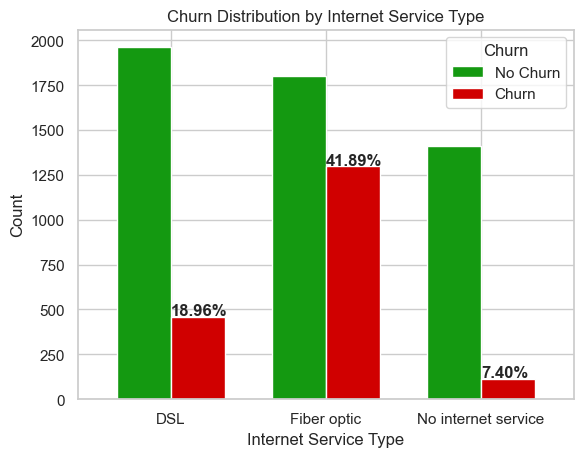

In [65]:
def plot_churn_by_internet_type(df):
    plt.figure(figsize=(10, 6))
    
    churn_counts = df.groupby(['internet_service_type', 'churn']).size().unstack()
    total_counts = churn_counts.sum(axis=1)
    churn_percentages = churn_counts['Yes'] / total_counts * 100
    
    churn_counts.plot(kind='bar', stacked=False, color=["#149911", "#D00000"], width=0.7)
    
    plt.title('Churn Distribution by Internet Service Type')
    plt.xlabel('Internet Service Type')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    for i, percentage in enumerate(churn_percentages):
        plt.text(i, churn_counts.iloc[i, 1] + 10, f'{percentage:.2f}%', ha='left', weight='bold')
    
    plt.legend(title='Churn', labels=['No Churn', 'Churn'])
    plt.show()

# Call the function to plot the churn distribution by internet service type
plot_churn_by_internet_type(df)


<Figure size 1000x600 with 0 Axes>

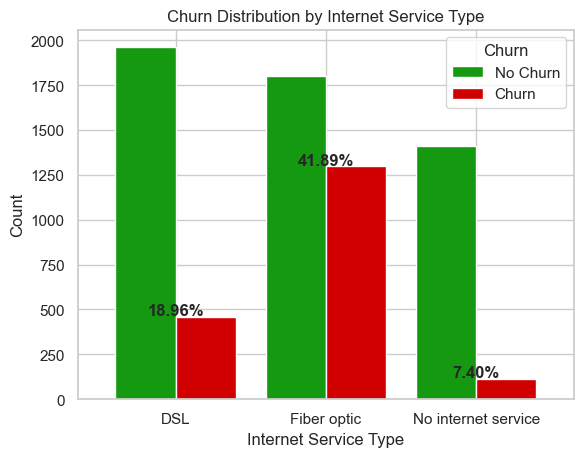

In [63]:
def plot_churn_by_internet_service(df):
    plt.figure(figsize=(10, 6))
    
    churn_counts = df.groupby(['internet_service_type', 'churn']).size().unstack()
    total_counts = churn_counts.sum(axis=1)
    churn_percentages = churn_counts['Yes'] / total_counts * 100
    
    ax = churn_counts.plot(kind='bar', stacked=False, color=["#149911", "#D00000"], width=.8)
    
    plt.title('Churn Distribution by Internet Service Type')
    plt.xlabel('Internet Service Type')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    for i, percentage in enumerate(churn_percentages):
        plt.text(i, churn_counts.iloc[i, 1] + 10, f'{percentage:.2f}%', ha='center', weight='bold')
    
    ax.legend(title='Churn', labels=['No Churn', 'Churn'])
    plt.show()

# Call the function to plot the churn distribution by internet service type with adjusted bar widths
plot_churn_by_internet_service(df)


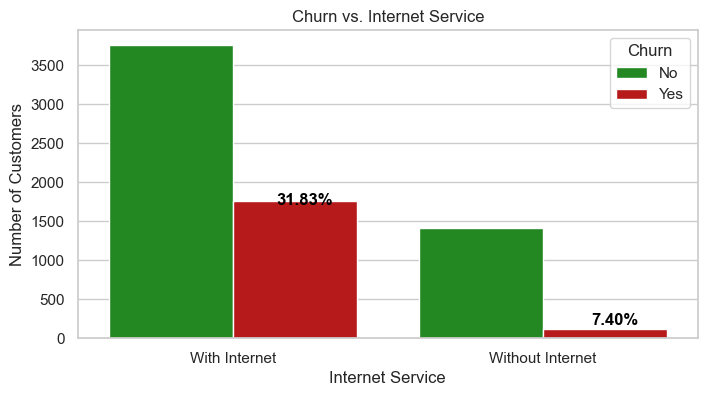

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_churn_vs_internet_service_ratio(df):
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 4))

    # Calculate churn ratios for internet service types
    churn_ratio_internet_yes = (df[df['internet_service'] == 'Yes']['churn'].value_counts()['Yes'] /
                                (df[df['internet_service'] == 'Yes']['churn'].value_counts()['Yes'] +
                                df[df['internet_service'] == 'Yes']['churn'].value_counts()['No'])) * 100

    churn_ratio_internet_no = (df[df['internet_service'] == 'No']['churn'].value_counts()['Yes'] /
                               (df[df['internet_service'] == 'No']['churn'].value_counts()['Yes'] +
                                df[df['internet_service'] == 'No']['churn'].value_counts()['No'])) * 100

    # Create a bar plot for internet service types and churn rates
    ax = sns.countplot(x='internet_service', hue='churn', data=df, palette=["#149911", "#D00000"])

    # Set new labels for x-axis
    ax.set_xticklabels(['With Internet', 'Without Internet'])

    plt.title("Churn vs. Internet Service")
    plt.xlabel("Internet Service")
    plt.ylabel("Number of Customers")
    plt.legend(title='Churn', labels=['No', 'Yes'])
    
    # Annotate the churned columns with the churn ratio
    ax.annotate(f"{churn_ratio_internet_yes:.2f}%", xy=(0, churn_ratio_internet_yes), xytext=(52, 92),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_internet_no:.2f}%", xy=(1, churn_ratio_internet_no), xytext=(52, 7),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')


# Call the function to create the plot
plot_churn_vs_internet_service_ratio(df)
plt.show()


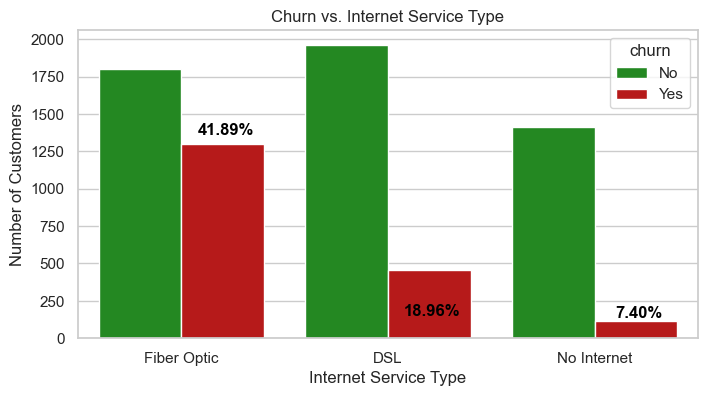

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_churn_by_internet_service(df):
    # Calculate churn counts
    churn_counts = df['churn'].value_counts()

    # Calculate churn ratios for internet service types
    churn_ratios = {}
    internet_service_types = ['Fiber optic', 'DSL', 'No internet service']
    
    for service_type in internet_service_types:
        churned_count = df[(df['internet_service_type'] == service_type) & (df['churn'] == 'Yes')]['churn'].count()
        unchurned_count = df[(df['internet_service_type'] == service_type) & (df['churn'] == 'No')]['churn'].count()
        
        churn_ratio = (churned_count / (churned_count + unchurned_count)) * 100
        churn_ratios[service_type] = churn_ratio
    
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 4))

    # Map index values to labels
    churn_counts.index = churn_counts.index.map({'Yes': "Churned", 'No': "Non-Churned"})

    # Create a bar plot for internet service types and churn rates
    ax = sns.countplot(x='internet_service_type', hue='churn', data=df, palette=["#149911", "#D00000"],
                       order=['Fiber optic', 'DSL', 'No internet service'])

    # Set new labels for x-axis
    ax.set_xticklabels(['Fiber Optic', 'DSL', 'No Internet'])

    plt.title("Churn vs. Internet Service Type")
    plt.xlabel("Internet Service Type")
    plt.ylabel("Number of Customers")
    
    
    # Annotate the churned columns with the churn ratio
    ax.annotate(f"{churn_ratios['Fiber optic']:.2f}%", xy=(0, churn_ratios['Fiber optic']), xytext=(32, 12),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')
    
    ax.annotate(f"{churn_ratios['DSL']:.2f}%", xy=(1, churn_ratios['DSL']), xytext=(32, 12),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')
    
    ax.annotate(f"{churn_ratios['No internet service']:.2f}%", xy=(2, churn_ratios['No internet service']), xytext=(32, 12),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    plt.show()

# Call the function with your DataFrame
plot_churn_by_internet_service(df)


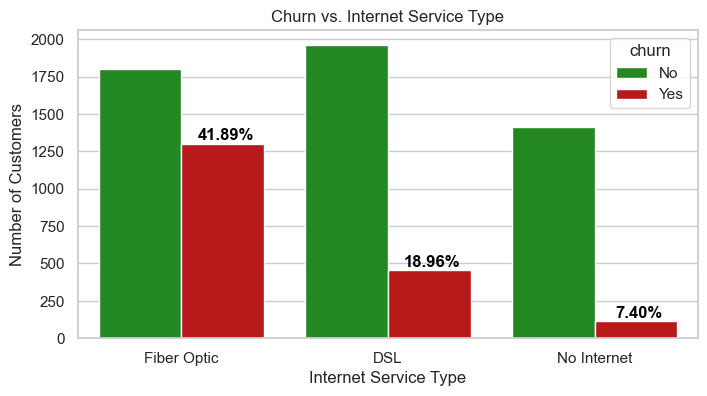

In [49]:
def plot_churn_by_internet_service(df):
    # Calculate churn counts
    churn_counts = df['churn'].value_counts()

    # Calculate churn ratios for internet service types
    churn_ratios = {}
    internet_service_types = ['Fiber optic', 'DSL', 'No internet service']
    
    for service_type in internet_service_types:
        churned_count = df[(df['internet_service_type'] == service_type) & (df['churn'] == 'Yes')]['churn'].count()
        unchurned_count = df[(df['internet_service_type'] == service_type) & (df['churn'] == 'No')]['churn'].count()
        
        churn_ratio = (churned_count / (churned_count + unchurned_count)) * 100
        churn_ratios[service_type] = churn_ratio
    
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 4))

    # Map index values to labels
    churn_counts.index = churn_counts.index.map({'Yes': "Churned", 'No': "Non-Churned"})

    # Create a bar plot for internet service types and churn rates
    ax = sns.countplot(x='internet_service_type', hue='churn', data=df, palette=["#149911", "#D00000"],
                       order=['Fiber optic', 'DSL', 'No internet service'])

    # Set new labels for x-axis
    ax.set_xticklabels(['Fiber Optic', 'DSL', 'No Internet'])

    plt.title("Churn vs. Internet Service Type")
    plt.xlabel("Internet Service Type")
    plt.ylabel("Number of Customers")

    # Semi-annotate the churned columns with the churn ratio
    ax.annotate(f"{churn_ratios['Fiber optic']:.2f}%", xy=(0, churn_ratios['Fiber optic']), xytext=(32, 136),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')
    
    ax.annotate(f"{churn_ratios['DSL']:.2f}%", xy=(1, churn_ratios['DSL']), xytext=(32, 47),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')
    
    ax.annotate(f"{churn_ratios['No internet service']:.2f}%", xy=(2, churn_ratios['No internet service']), xytext=(32, 12),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    plt.show()

# Call the function with your DataFrame
plot_churn_by_internet_service(df)


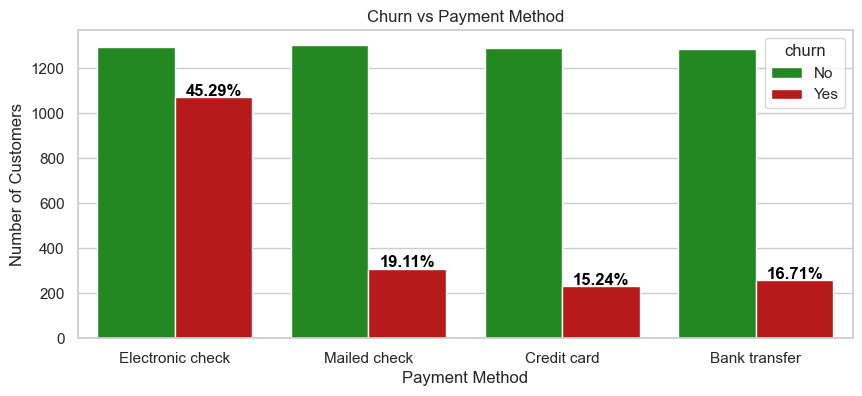

In [72]:
def plot_churn_vs_payment_method(df):
    # Calculate churn ratios for payment methods
    churn_ratio_mailed_check = (df[df['payment_method'] == 'Mailed check']['churn'].value_counts()['Yes'] /
                                 (df[df['payment_method'] == 'Mailed check']['churn'].value_counts()['Yes'] +
                                  df[df['payment_method'] == 'Mailed check']['churn'].value_counts()['No'])) * 100
    
    churn_ratio_electronic_check = (df[df['payment_method'] == 'Electronic check']['churn'].value_counts()['Yes'] /
                                    (df[df['payment_method'] == 'Electronic check']['churn'].value_counts()['Yes'] +
                                     df[df['payment_method'] == 'Electronic check']['churn'].value_counts()['No'])) * 100
    
    churn_ratio_credit_card = (df[df['payment_method'] == 'Credit card']['churn'].value_counts()['Yes'] /
                               (df[df['payment_method'] == 'Credit card']['churn'].value_counts()['Yes'] +
                                df[df['payment_method'] == 'Credit card']['churn'].value_counts()['No'])) * 100
    
    churn_ratio_bank_transfer = (df[df['payment_method'] == 'Bank transfer']['churn'].value_counts()['Yes'] /
                                 (df[df['payment_method'] == 'Bank transfer']['churn'].value_counts()['Yes'] +
                                  df[df['payment_method'] == 'Bank transfer']['churn'].value_counts()['No'])) * 100
    
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 4))

    # Create a bar plot for payment methods and churn rates
    ax = sns.countplot(x='payment_method', hue='churn', data=df, palette=["#149911", "#D00000"], order=['Electronic check', 'Mailed check', 'Credit card', 'Bank transfer'])

    plt.title("Churn vs Payment Method")
    plt.xlabel("Payment Method")
    plt.ylabel("Number of Customers")

    # Annotate the churned columns with the churn ratio
    ax.annotate(f"{churn_ratio_electronic_check:.2f}%", xy=(0, churn_ratio_electronic_check), xytext=(28, 165),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_mailed_check:.2f}%", xy=(1, churn_ratio_mailed_check), xytext=(28, 46),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_credit_card:.2f}%", xy=(2, churn_ratio_credit_card), xytext=(28, 34),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_bank_transfer:.2f}%", xy=(3, churn_ratio_bank_transfer), xytext=(28, 38),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    plt.show()

# Call the function to create the churn distribution by payment method visualization
plot_churn_vs_payment_method(df)


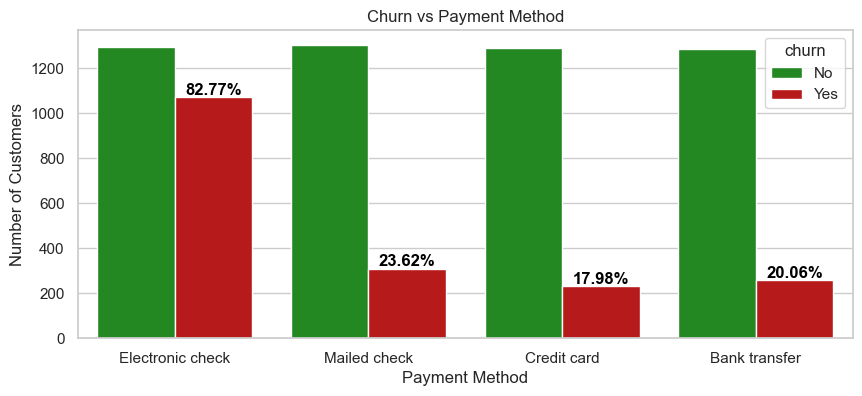

In [ ]:
def plot_churn_vs_payment_method(df):
    # Calculate churn ratios for payment methods
    churn_ratio_mailed_check = (df[df['payment_method'] == 'Mailed check']['churn'].value_counts()['Yes'] /
                                 df[df['payment_method'] == 'Mailed check']['churn'].value_counts()['No']) * 100
    churn_ratio_electronic_check = (df[df['payment_method'] == 'Electronic check']['churn'].value_counts()['Yes'] /
                                    df[df['payment_method'] == 'Electronic check']['churn'].value_counts()['No']) * 100
    churn_ratio_credit_card = (df[df['payment_method'] == 'Credit card']['churn'].value_counts()['Yes'] /
                               df[df['payment_method'] == 'Credit card']['churn'].value_counts()['No']) * 100
    churn_ratio_bank_transfer = (df[df['payment_method'] == 'Bank transfer']['churn'].value_counts()['Yes'] /
                                 df[df['payment_method'] == 'Bank transfer']['churn'].value_counts()['No']) * 100

    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 4))

    # Create a bar plot for payment methods and churn rates
    ax = sns.countplot(x='payment_method', hue='churn', data=df, palette=["#149911", "#D00000"], order=['Electronic check', 'Mailed check', 'Credit card', 'Bank transfer'])

    plt.title("Churn vs Payment Method")
    plt.xlabel("Payment Method")
    plt.ylabel("Number of Customers")

    # Annotate the churned columns with the churn ratio
    ax.annotate(f"{churn_ratio_electronic_check:.2f}%", xy=(0, churn_ratio_electronic_check), xytext=(28, 160),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_mailed_check:.2f}%", xy=(1, churn_ratio_mailed_check), xytext=(28, 46),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_credit_card:.2f}%", xy=(2, churn_ratio_credit_card), xytext=(28, 34),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_bank_transfer:.2f}%", xy=(3, churn_ratio_bank_transfer), xytext=(28, 38),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    plt.show()

# Call the function to create the churn distribution by payment method visualization
plot_churn_vs_payment_method(df)
